###### Importing Libraries

In [ ]:
import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

###### Mounting Drive

In [ ]:
 drive.mount('/content/drive') 

Mounted at /content/drive




###### Set path for training, test and validation directories

In [ ]:
path = '/content/drive/My Drive/image_augmentation/dataset'
train_dir = '/content/drive/My Drive/image_augmentation/dataset/train'
validation_dir = '/content/drive/My Drive/image_augmentation/dataset/validation'
test_dir = '/content/drive/My Drive/image_augmentation/dataset/test'


In [ ]:
train_landslide_dir = '/content/drive/My Drive/image_augmentation/dataset/train/landslide'
train_non_landslide_dir = '/content/drive/My Drive/image_augmentation/dataset/train/non_landslide'

validation_landslide_dir = '/content/drive/My Drive/image_augmentation/dataset/validation/landslide'
validation_non_landside_dir ='/content/drive/My Drive/image_augmentation/dataset/validation/non_landslide'

test_landslide_dir = '/content/drive/My Drive/image_augmentation/dataset/test/landslide'
test_non_landslide_dir = '/content/drive/My Drive/image_augmentation/dataset/test/non_landslide'


In [ ]:
num_landslide_train = len(os.listdir(train_landslide_dir))
num_non_landslide_train = len(os.listdir(train_non_landslide_dir))

num_landslide_validation = len(os.listdir(validation_landslide_dir))
num_non_landslide_validation = len(os.listdir(validation_non_landside_dir))

num_landslide_test = len(os.listdir(test_landslide_dir))
num_non_landslide_test = len(os.listdir(test_non_landslide_dir))



##### Printing Total Numbers of Training, Testing and validation images

In [ ]:
print('Total Training Images of Landslides',num_landslide_train)
print('Total Training Images of Non Landslides',num_non_landslide_train)
print('\n************************\n')
print('Total Validation Images of Landslides',num_landslide_validation)
print('Total Validation Images of Non Landslides',num_non_landslide_validation)
print('\n************************\n')
print('Total Testing Images of Landslides',num_landslide_test)
print('Total Testing Images of Non Landslides',num_non_landslide_test)


Total Training Images of Landslides 200
Total Training Images of Non Landslides 200

************************

Total Validation Images of Landslides 25
Total Validation Images of Non Landslides 25

************************

Total Testing Images of Landslides 25
Total Testing Images of Non Landslides 25


In [ ]:
total_train = num_landslide_train+num_non_landslide_train
total_validation = num_landslide_validation+num_non_landslide_validation
total_test = num_landslide_test+num_non_landslide_test

In [ ]:
print('Total Training Images',total_train)
print('Total Validation Images',total_validation)
print('Total Testing Images',total_test)

Total Training Images 400
Total Validation Images 50
Total Testing Images 50


###### Defining Batch-size and image_shape for deep learning model

In [ ]:
BATCH_SIZE = 120
IMG_SHAPE  = 150 


###### Function for plotting images

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,3,figsize=(12,12))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

##### Applying Data Agumentation

In [24]:
image_gen_train = ImageDataGenerator(rescale=1./255,zoom_range=0.2)
''' Replace the above line of code with the required code for other augmentation techniques as specified below:
    ImageDataGenerator(rescale=1./255,rotation_range=40,fill_mode='nearest')
    ImageDataGenerator(rescale=1./255,width_shift_range=0.2, height_shift_range=0.2)
    ImageDataGenerator(rescale=1./255,horizontal_flip=True, vertical_flip=True)
    ImageDataGenerator(rescale=1./255,brightness_range=[0.4,1.5])    
'''

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 361 images belonging to 2 classes.


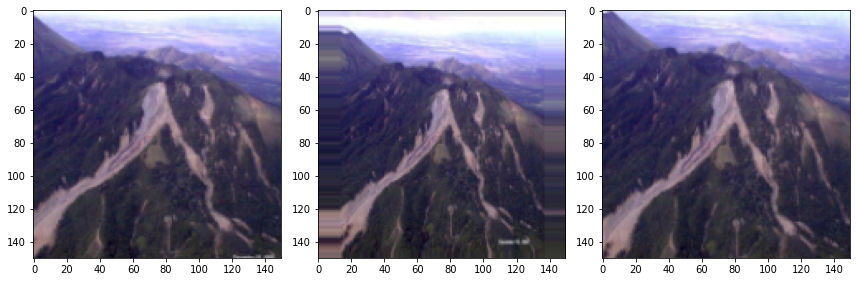

In [ ]:
augmented_images = [train_data_gen[0][0][1] for i in range(3)]
plotImages(augmented_images)

###### Pre-Processing for testing and validation data

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')
image_gen_test = ImageDataGenerator(rescale=1./255)

test_data_gen = image_gen_test.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=test_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')



Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


##### Defining Model Parameters

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

###### Let's Start Training

In [ ]:
epochs=20
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_validation / float(BATCH_SIZE))),
    verbose= 1
)

Epoch 1/20
4/4 [==============================] - 61s 11s/step - loss: 0.7939 - accuracy: 0.5094 - val_loss: 0.6848 - val_accuracy: 0.7600
Epoch 2/20
4/4 [==============================] - 18s 4s/step - loss: 0.6788 - accuracy: 0.6318 - val_loss: 0.6469 - val_accuracy: 0.6600
Epoch 3/20
4/4 [==============================] - 18s 4s/step - loss: 0.6383 - accuracy: 0.7303 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 18s 4s/step - loss: 0.5995 - accuracy: 0.5830 - val_loss: 0.4580 - val_accuracy: 0.8000
Epoch 5/20
4/4 [==============================] - 18s 4s/step - loss: 0.4097 - accuracy: 0.8543 - val_loss: 1.2827 - val_accuracy: 0.5800
Epoch 6/20
4/4 [==============================] - 18s 4s/step - loss: 0.9108 - accuracy: 0.6701 - val_loss: 0.5144 - val_accuracy: 0.7800
Epoch 7/20
4/4 [==============================] - 18s 4s/step - loss: 0.5288 - accuracy: 0.7609 - val_loss: 0.5292 - val_accuracy: 0.6800
Epoch 8/20
4/4 [=================

###### Visualization of validation-Training (Accuracy and Loss)

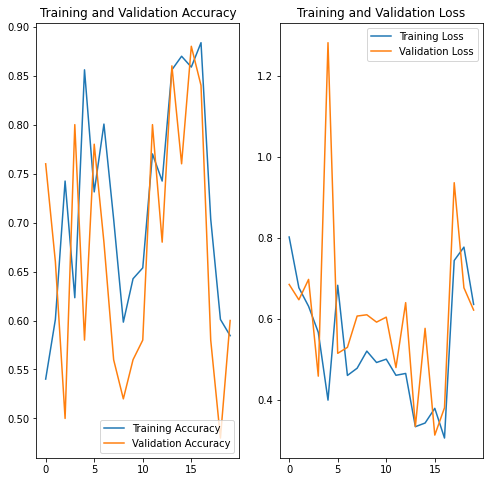

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

results = model.evaluate(train_data_gen)
print("train_loss, train accuracy",results)

4/4 [==============================] - 7s 1s/step - loss: 0.6307 - accuracy: 0.7202
train_loss, train accuracy [0.6307077407836914, 0.7202215790748596]


In [ ]:
results = model.evaluate(val_data_gen)
print("val_loss, val accuracy",results)

1/1 [==============================] - 1s 712ms/step - loss: 0.6214 - accuracy: 0.6000
val_loss, val accuracy [0.6214269399642944, 0.6000000238418579]


In [ ]:
results = model.evaluate(test_data_gen)
print("test_loss, test accuracy",results)

1/1 [==============================] - 1s 694ms/step - loss: 0.6119 - accuracy: 0.7600
test_loss, test accuracy [0.611888587474823, 0.7599999904632568]
